In [1]:
import os
os.chdir('D:\Loveforlearning_books\jobs_varsha\Practice_10jan')

In [2]:
os.getcwd()

'D:\\Loveforlearning_books\\jobs_varsha\\Practice_10jan'

In [3]:
import pandas as pd
cars_data= pd.read_csv('Toyota.csv',index_col = 0, na_values = ['??','????'])

In [4]:
cars_data1= cars_data.copy() ##deep-copy 

In [5]:
cars_data1.index ##row labels count 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435],
           dtype='int64', length=1436)

In [6]:
cars_data1.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [7]:
cars_data1.size #no.of rows * no.of columns 

14360

In [8]:
cars_data1.shape

(1436, 10)

In [9]:
cars_data1.memory_usage()

Index        11488
Price        11488
Age          11488
KM           11488
FuelType     11488
HP           11488
MetColor     11488
Automatic    11488
CC           11488
Doors        11488
Weight       11488
dtype: int64

In [10]:
cars_data1.ndim

2

In [11]:
#character datatype has two types . category and object 
# if a column contains mixed types it is assigned as object datatype 
cars_data1.dtypes

Price          int64
Age          float64
KM           float64
FuelType      object
HP           float64
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

In [12]:
cars_data1.select_dtypes(exclude = [object])

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
0,13500,23.0,46986.0,90.0,1.0,0,2000,1165
1,13750,23.0,72937.0,90.0,1.0,0,2000,1165
2,13950,24.0,41711.0,90.0,NaN,0,2000,1165
3,14950,26.0,48000.0,90.0,0.0,0,2000,1165
4,13750,30.0,38500.0,90.0,0.0,0,2000,1170
...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,86.0,1.0,0,1300,1025
1432,10845,72.0,NaN,86.0,0.0,0,1300,1015
1433,8500,NaN,17016.0,86.0,0.0,0,1300,1015
1434,7250,70.0,NaN,86.0,1.0,0,1300,1015


In [13]:
cars_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [14]:
import numpy as np
np.unique(cars_data1['KM'])

array([1.0000e+00, 1.5000e+01, 2.2500e+02, ..., 2.3294e+05, 2.4300e+05,
              nan])

In [15]:
np.unique(cars_data1['HP'])

array([ 69.,  71.,  72.,  73.,  86.,  90.,  97.,  98., 107., 110., 116.,
       192.,  nan])

In [16]:
np.unique(cars_data1['MetColor'])

array([ 0.,  1., nan])

In [17]:
##np.unique(cars_data1['FuelType'])

In [18]:
cars_data1['MetColor'] = cars_data1['MetColor'].astype('object') ##conv to object datatype 

In [19]:
cars_data1['Automatic'] = cars_data1['Automatic'].astype('object')

In [20]:
cars_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 123.4+ KB


In [21]:
##Clean column 'Doors'. replace the string value with the integer 
np.unique(cars_data1['Doors'])

array(['2', '3', '4', '5', 'five', 'four', 'three'], dtype=object)

In [22]:
cars_data1['Doors'].replace('three',3,inplace= True)
cars_data1['Doors'].replace('four',4,inplace= True)
cars_data1['Doors'].replace('five',5,inplace= True)

In [23]:
cars_data1['Doors']= cars_data1['Doors'].astype('int64')

##To check the count of missing values 
cars_data1.isnull().sum()

In [24]:
cars_data1.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [25]:
##Create three bins for price --> seperating the class of price as high, medium and low. 
cars_data1.insert(10,"Price_class", " ") ##10 is the position of new column 

In [26]:
for i in range(0,len(cars_data1['Price']),1):
    if(cars_data1['Price'][i]<=8450):
        cars_data1['Price_class'][i]="Low"
    elif((cars_data1['Price'][i]>11950)):
        cars_data1['Price_class'][i]="High"
    else: cars_data1['Price_class'][i]="Medium"
                           
               

C:\Users\shiva\AppData\Local\Temp\ipykernel_828\1530109563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data1['Price_class'][i]="High"
C:\Users\shiva\AppData\Local\Temp\ipykernel_828\1530109563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data1['Price_class'][i]="Low"
C:\Users\shiva\AppData\Local\Temp\ipykernel_828\1530109563.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else: cars_data1['Price_class'][i]=

In [27]:
cars_data1['Price_class'].value_counts()

Medium    751
Low       369
High      316
Name: Price_class, dtype: int64

In [28]:
cars_data1.insert(11,"Age_converted", " ") ##10 is the position of new column age coveted

In [29]:
def c_convert(val):
    val_converted = val/12
    return val_converted

In [30]:
cars_data1['Age_converted']=c_convert(cars_data1['Age'])
cars_data1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class,Age_converted
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.916667
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.916667
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High,2.000000
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High,2.166667
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025,Low,NaN
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015,Medium,6.000000
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015,Medium,NaN
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015,Low,5.833333


In [31]:
cars_data1['Age_converted']= round(cars_data1['Age_converted'],1)

In [32]:
cars_data1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class,Age_converted
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High,2.0
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High,2.2
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025,Low,NaN
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015,Medium,6.0
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015,Medium,NaN
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015,Low,5.8


In [33]:
cars_data1.insert(12,"KM_per_month",0)

In [34]:
##multiple input multiple output function.
def c_convert(val1,val2):
    val_converted= val1/12
    ratio = val2/val1
    return [val_converted,ratio]


In [35]:
cars_data1["Age_converted"],cars_data1["KM_per_month"]=c_convert(cars_data1['Age'],cars_data1['KM'])

In [36]:
cars_data1.head(3)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_class,Age_converted,KM_per_month
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.916667,2042.869565
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.916667,3171.173913
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High,2.000000,1737.958333


In [37]:
cars_data1['FuelType'].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [38]:
#freq distribution of fueltype 
pd.crosstab(index=cars_data1['FuelType'], columns = 'count', dropna= True)

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1177


In [39]:
#to check freq dist of fueltype with respect to gearboxtype. 
pd.crosstab(index= cars_data1['Automatic'],columns = cars_data1['FuelType'],dropna = True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1104
1,0,0,73


-----> rows; automatic(0- manual gear . 1- automatic gear box) column : fueltype. 
-----> 15 cars of cng type have manual gear box. 144 diesel cars have manual gear box and 1104 petrol cars have manual gear box.
------> automatic gear box cars have only petrol type. there are no cng n diesle cars with automatic gear box type. 

In [40]:
##Joint probability : Likelihood of two independent events occuring at same time. 
##Normalize = true to convert numbers to proportion. 
pd.crosstab(index= cars_data1['Automatic'],columns = cars_data1['FuelType'], normalize = True, dropna = True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011228,0.107784,0.826347
1,0.000000,0.000000,0.054641


In [41]:
#Marginal probability 
pd.crosstab(index= cars_data1['Automatic'],columns = cars_data1['FuelType'], margins = \
            True, normalize = True, dropna = True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011228,0.107784,0.826347,0.945359
1,0.000000,0.000000,0.054641,0.054641
All,0.011228,0.107784,0.880988,1.000000


In [42]:
##Conditional probavilty : probability of an event a given that another event b has already occured. 
pd.crosstab(index= cars_data1['Automatic'],columns = cars_data1['FuelType'], margins = True,\
            normalize = 'index', dropna = True)
#ormalize index means total of row values to 1. 

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011876,0.114014,0.874109
1,0.000000,0.000000,1.000000
All,0.011228,0.107784,0.880988


In [43]:
pd.crosstab(index= cars_data1['Automatic'],columns = cars_data1['FuelType'], margins = True,\
            normalize = 'columns', dropna = True)
#ormalize index means total of columns  values to 1. 

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,1.0,1.0,0.937978,0.945359
1,0.0,0.0,0.062022,0.054641


In [44]:
##Relation between two numerical variables using Correlation. 
##So, select omly numerical variables. 

num_var = cars_data1.select_dtypes(exclude=['object'])
num_var.shape

(1436, 9)

In [45]:
corr_matrix = num_var.corr()

In [46]:
corr_matrix

,Price,Age,KM,HP,CC,Doors,Weight,Age_converted,KM_per_month
Price,1.000000,-0.878407,-0.574720,0.309902,0.165067,0.185326,0.581198,-0.878407,-0.038704
Age,-0.878407,1.000000,0.512735,-0.157904,-0.120706,-0.157027,-0.464299,1.000000,-0.114745
KM,-0.574720,0.512735,1.000000,-0.335285,0.299993,-0.036191,-0.026271,0.512735,0.729894
HP,0.309902,-0.157904,-0.335285,1.000000,0.053758,0.097162,0.086737,-0.157904,-0.273574
CC,0.165067,-0.120706,0.299993,0.053758,1.000000,0.126768,0.651450,-0.120706,0.433470
Doors,0.185326,-0.157027,-0.036191,0.097162,0.126768,1.000000,0.302618,-0.157027,0.041161
Weight,0.581198,-0.464299,-0.026271,0.086737,0.651450,0.302618,1.000000,-0.464299,0.330868
Age_converted,-0.878407,1.000000,0.512735,-0.157904,-0.120706,-0.157027,-0.464299,1.000000,-0.114745
KM_per_month,-0.038704,-0.114745,0.729894,-0.273574,0.433470,0.041161,0.330868,-0.114745,1.000000


---> As age of the car increases , price of the car decreases. hence negatively correlated.
---> As age of car increases, KM driven by car increases, hence positively correlated. 
--->As weight of car increases. price of the car increases. hence positively correlated. 

Text(0, 0.5, 'Price of the car (Euros)')

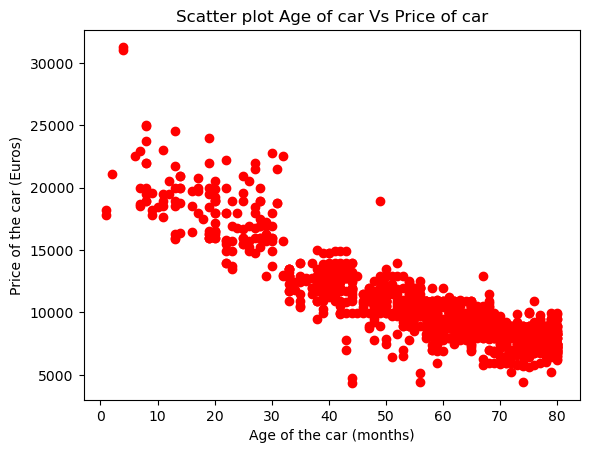

In [47]:
##DataVisualisation 

cars_data1.dropna(axis=0,inplace=True)

import matplotlib.pyplot as plt 
plt.scatter(cars_data1['Age'],cars_data1['Price'], c= 'red')
plt.title("Scatter plot Age of car Vs Price of car")
plt.xlabel('Age of the car (months)')
plt.ylabel('Price of the car (Euros)')

Text(0, 0.5, 'Frequency')

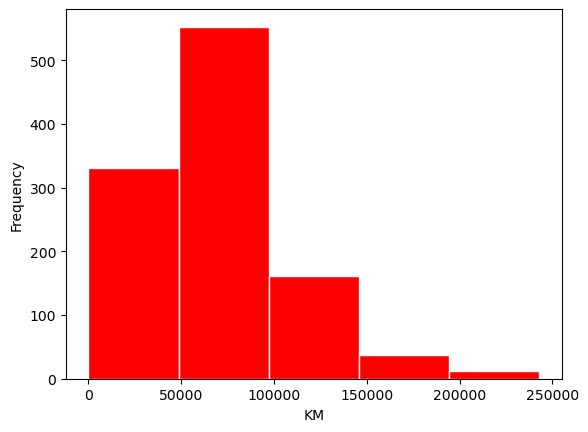

In [48]:
##Histogram : toplot the frequency of a numerical variable represented in bars of diff heights 
plt.hist(cars_data1['KM'],color= 'red', edgecolor = 'white', bins=5) 
##edgecolor to mark a speration between bins 
plt.xlabel('KM')
plt.ylabel('Frequency')

--->Most of the cars have travelled between 50000 to 1lakh km . There are only few cars that have travelled more than 2lakh kms 

In [49]:
cars_data1['FuelType'].value_counts()


Petrol    968
Diesel    116
CNG        12
Name: FuelType, dtype: int64

In [50]:
##Bar plot :freq of categorical data represented in bars .length of bar represents the freq of categorical variable. 
counts = [968,120,12]
fuelType = ('Petrol','Diesel','CNG')
index= np.arange(len(fuelType))

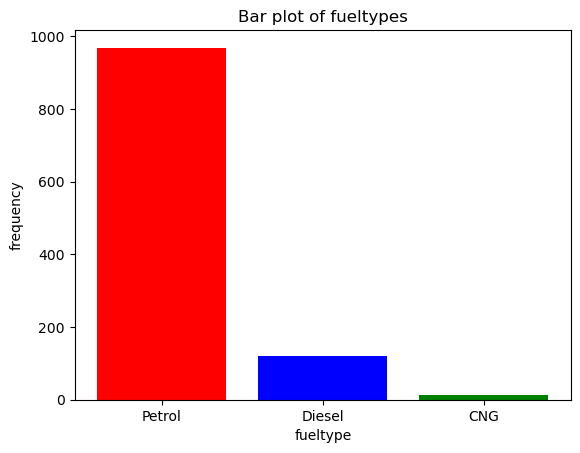

In [51]:
plt.bar(index,counts,color= ['red','blue','green'])
plt.title('Bar plot of fueltypes')
plt.xlabel('fueltype')
plt.ylabel('frequency')
plt.xticks(index,fuelType,rotation=0) ##to set the labels of fueltype 
plt.show()

In [52]:
##Removing missing values 
cars_data1.dropna(axis= 0, inplace = True )

In [53]:
cars_data1.size

14248

<AxesSubplot:xlabel='Age', ylabel='Price'>

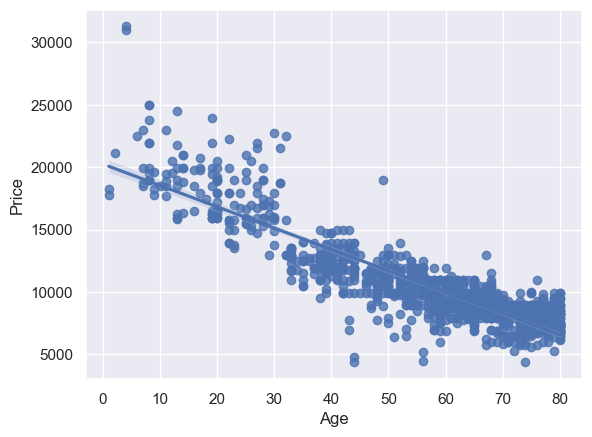

In [54]:
import seaborn as sns
sns.set(style="darkgrid")
sns.regplot(x=cars_data1['Age'], y=cars_data1['Price'])

<AxesSubplot:xlabel='Age', ylabel='Price'>

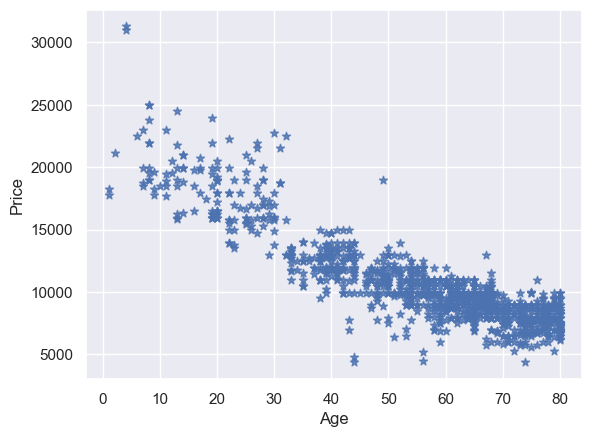

In [55]:
sns.regplot(x=cars_data1['Age'], y=cars_data1['Price'] , fit_reg = False , marker ='*') ##fit_reg for regression line. 

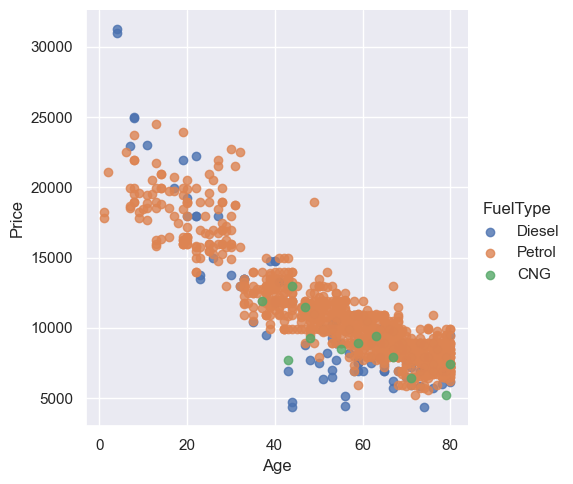

In [56]:
##Scatter plot of price vs age wrt fueltype 
sns.lmplot(x= 'Age', y= 'Price' , data= cars_data1 , fit_reg= False , hue = 'FuelType') ##lmplot is combi of reg plot and phasor grid. used wen third variable comes into picture. 


C:\Users\shiva\AppData\Local\Temp\ipykernel_828\1554133480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data1['Age'], kde= False , bins =5)


<AxesSubplot:xlabel='Age'>

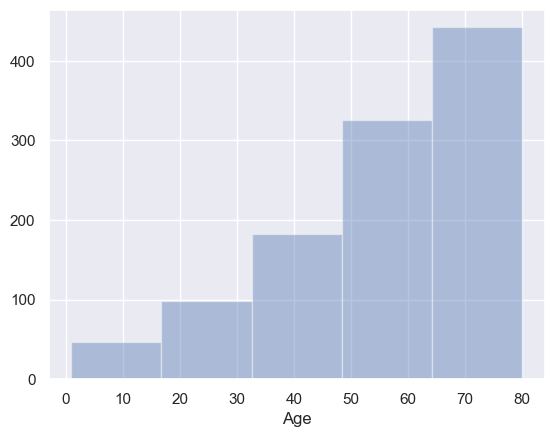

In [57]:
##Histogram 
#Sns gives kernel distribution by default 
sns.distplot(cars_data1['Age'], kde= False , bins =5)

<AxesSubplot:xlabel='FuelType', ylabel='count'>

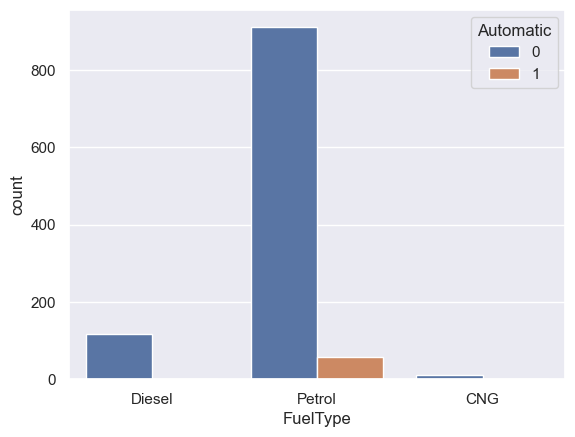

In [58]:
##GRouped bar plot of fueltype and Automatic 
sns.countplot(x='FuelType', data = cars_data1, hue= 'Automatic')

<AxesSubplot:ylabel='Price'>

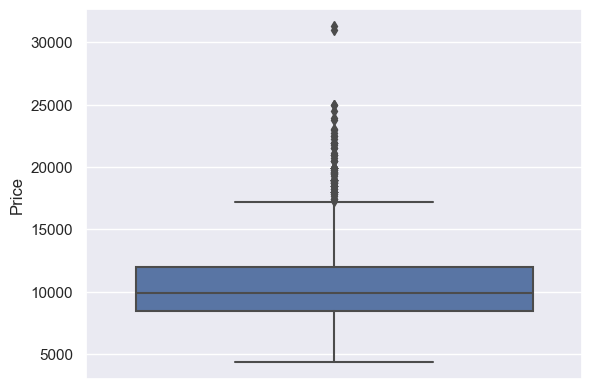

In [61]:
##to interpret Five nymber summary 
#Box and whisker plot for num var vs categorical variable. 
sns.boxplot(y= cars_data1['Price']) 

<AxesSubplot:xlabel='FuelType', ylabel='Price'>

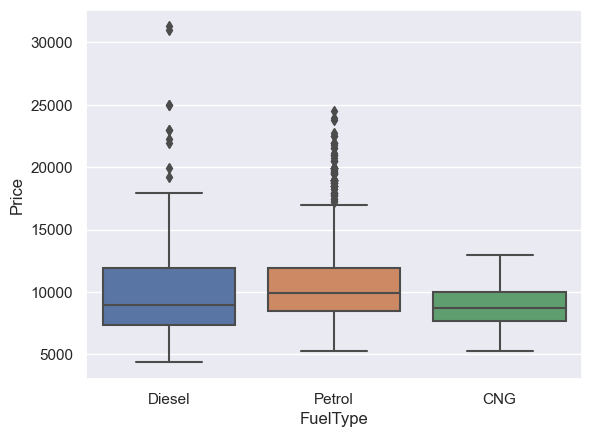

In [62]:
sns.boxplot(x = cars_data['FuelType'] , y= cars_data1['Price']) 

<AxesSubplot:xlabel='FuelType', ylabel='Price'>

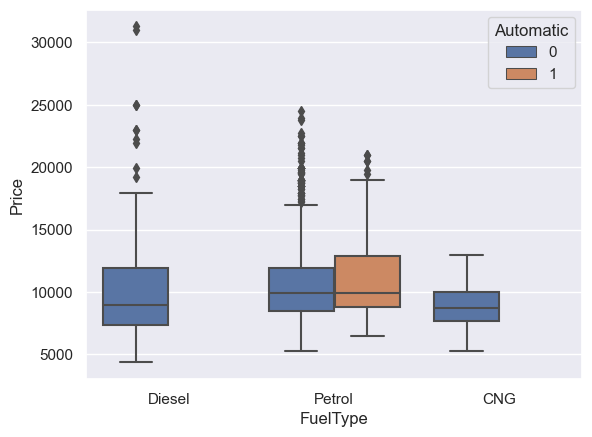

In [65]:
##grouped box and whiskers plot
sns.boxplot(x = 'FuelType' , y= cars_data1['Price'] , hue = 'Automatic', data = cars_data1) 

C:\Users\shiva\AppData\Local\Temp\ipykernel_828\1997084534.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_data1['Price'] , ax= ax_hist, kde = False)


<AxesSubplot:xlabel='Price'>

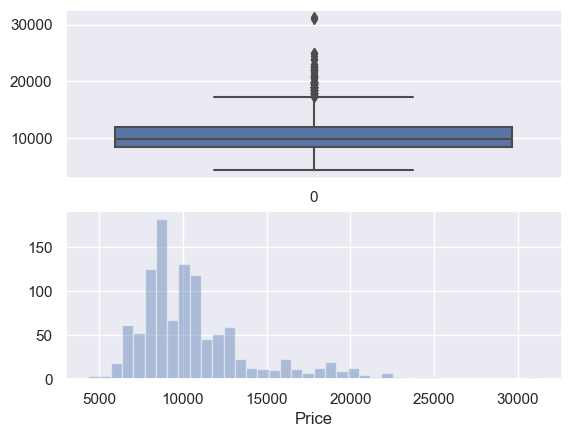

In [70]:
##multiple plots in single window. 
f,(ax_box, ax_hist) = plt.subplots(2,gridspec_kw = {"height_ratios" : (.50,.50)})
sns.boxplot(cars_data1['Price'], ax= ax_box)
sns.distplot(cars_data1['Price'] , ax= ax_hist, kde = False)

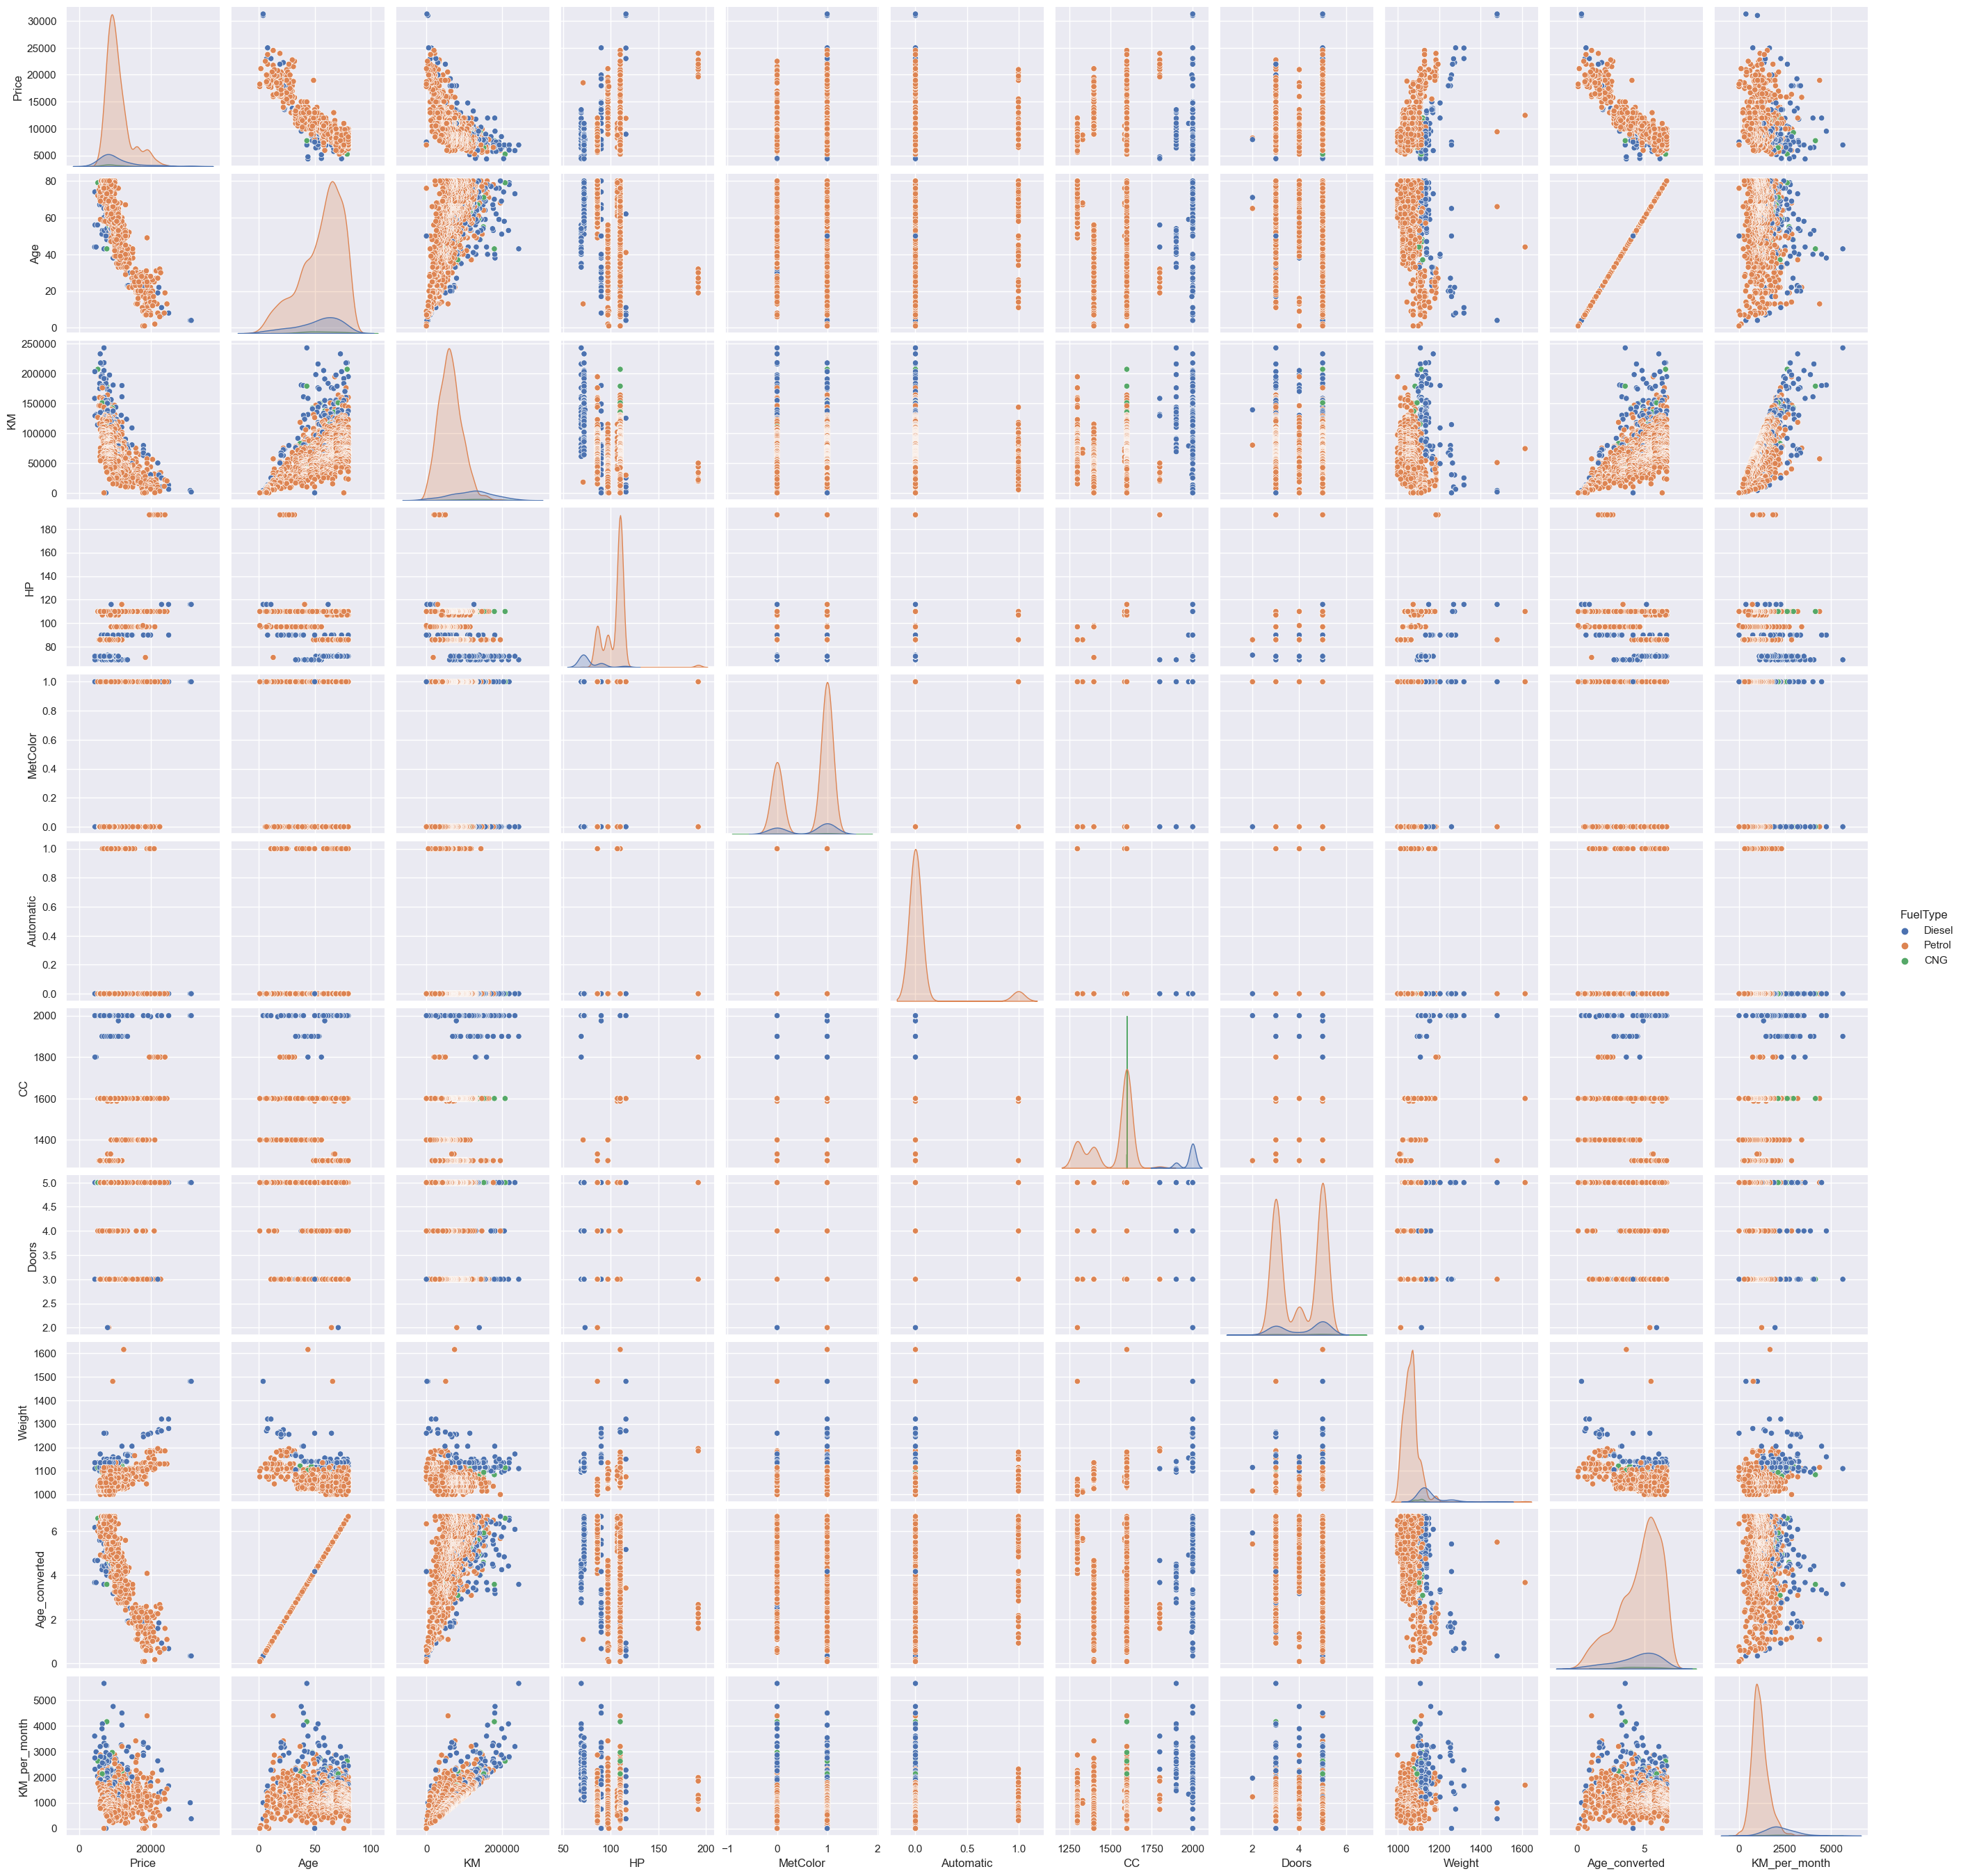

In [71]:
##Pairwise plot - all possible relationship between the variables 
sns.pairplot(cars_data1, kind = 'scatter' , hue= 'FuelType')
plt.show()